# MideaPipe

## Importing Libraries

In [1]:
import os

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

import mediapipe as mp

## Reading Data

In [2]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

In [3]:
def resize_and_show_image(image, which="plt"):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))

    if which == "cv2":
        cv2.imshow(name, img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        plt.imshow(img)

In [4]:
def show_images(images):

    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for index, (name, image) in enumerate(images.items()):
        plt.subplot(3,10, index+1)
        plt.xticks([])
        plt.yticks([])
        h, w = image.shape[:2]
        if h < w:
            img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
        else:
            img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
        # cv2.imshow(name, img)
        # cv2.waitKey(1000)
        # cv2.destroyAllWindows()
        plt.imshow(img)
        plt.xlabel(name)


In [5]:
DATA_DIR = '../data/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

## Displaying Images

<Figure size 640x480 with 0 Axes>

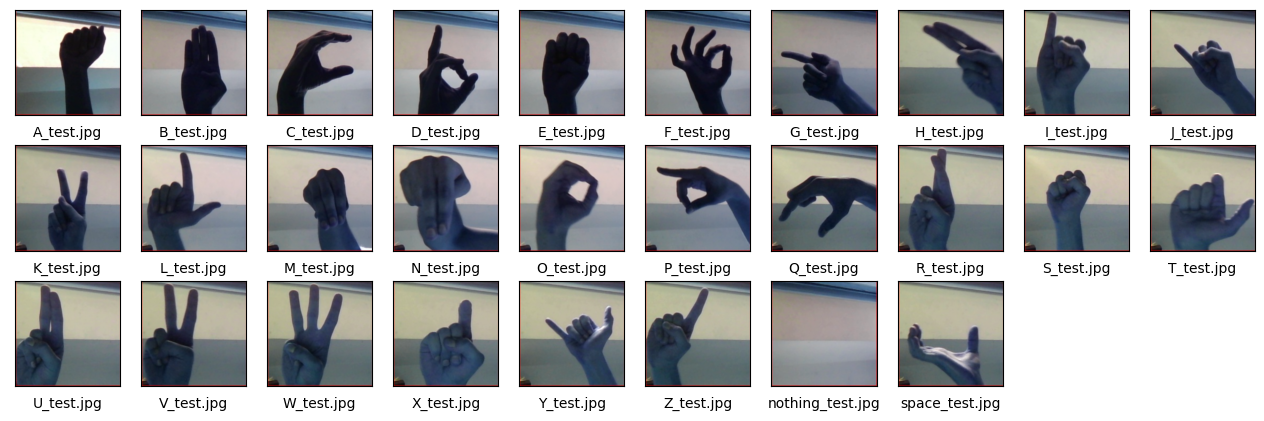

In [6]:
images = {name: cv2.imread(os.path.join(DATA_DIR,name)) for name in sorted(os.listdir(DATA_DIR))}

show_images(images)

## MediaPipe

In [7]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [8]:
help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.ob

Image: A
Handedness: None
No Landmark Found for A
Image: B
Handedness: [classification {
  index: 0
  score: 0.9906328320503235
  label: "Left"
}
]


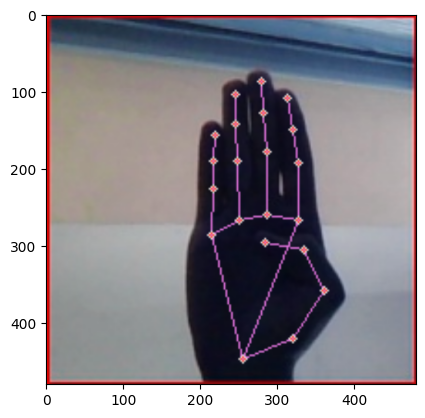

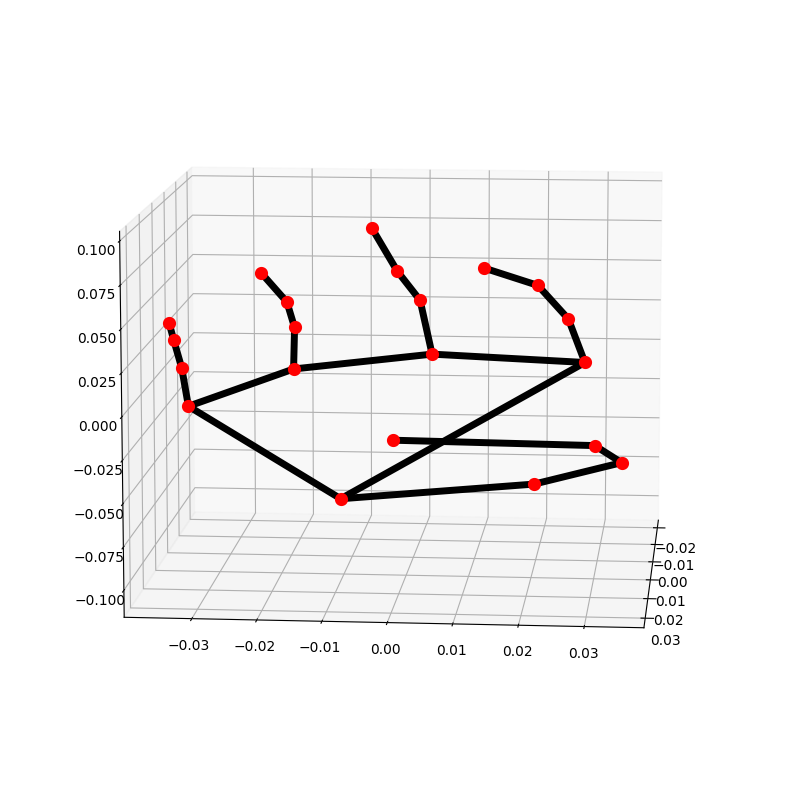

Image: C
Handedness: None
No Landmark Found for C
Image: D
Handedness: None
No Landmark Found for D
Image: E
Handedness: None
No Landmark Found for E
Image: F
Handedness: [classification {
  index: 0
  score: 0.9624602198600769
  label: "Left"
}
]


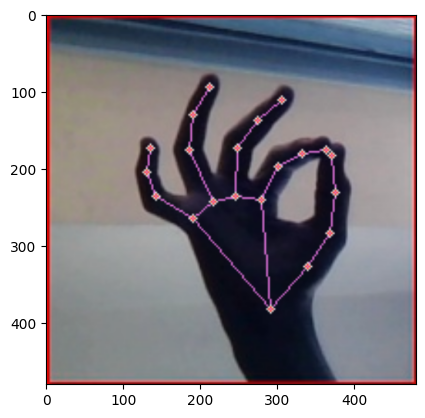

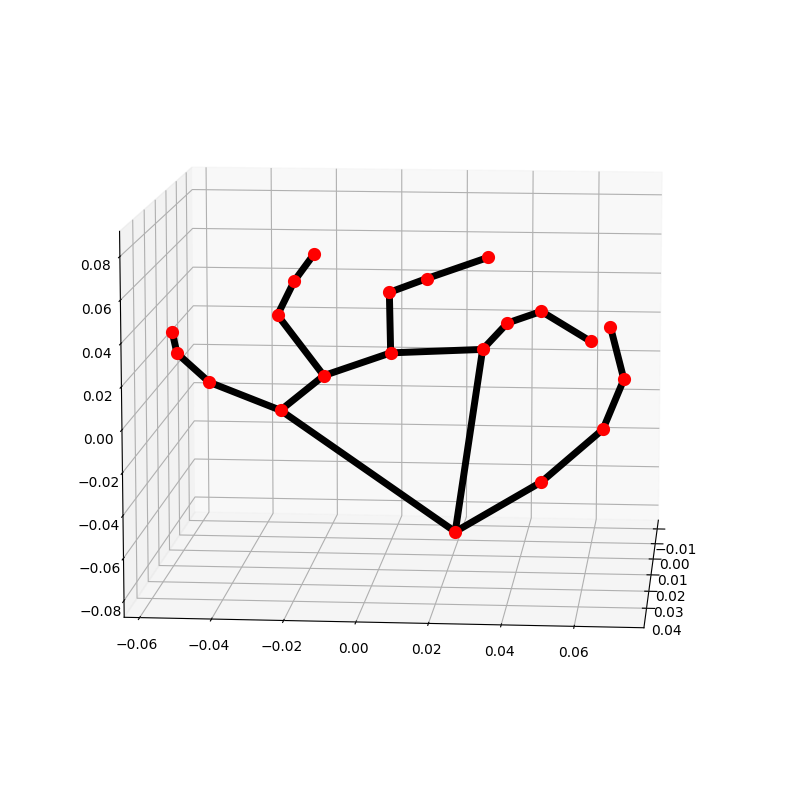

Image: G
Handedness: [classification {
  index: 0
  score: 0.9985156059265137
  label: "Left"
}
]


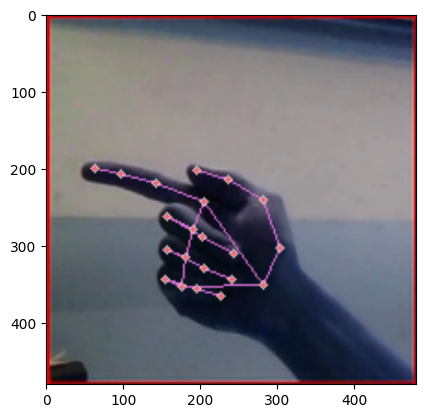

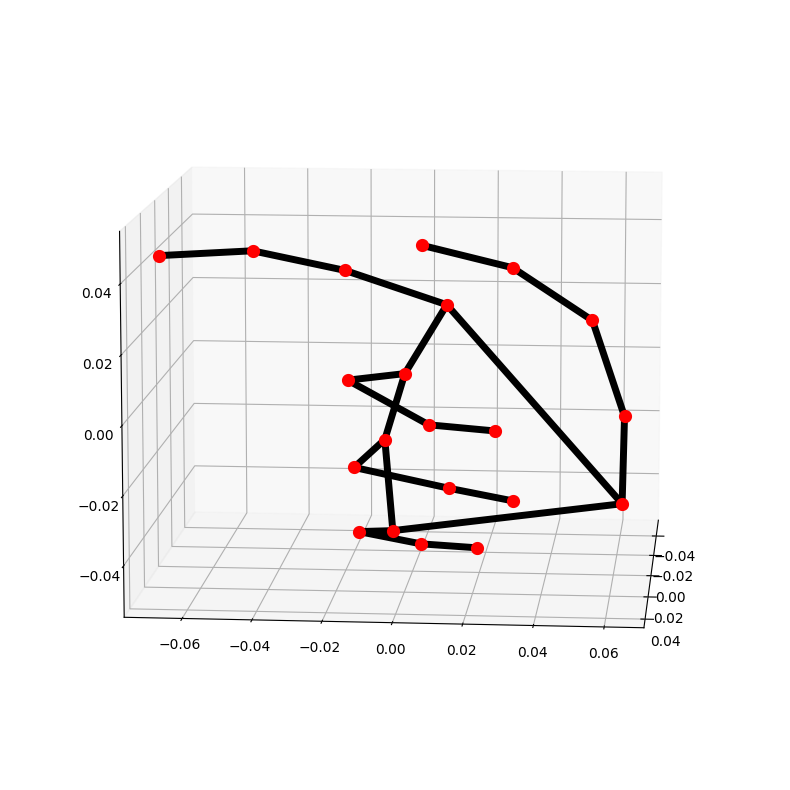

Image: H
Handedness: None
No Landmark Found for H
Image: I
Handedness: [classification {
  index: 0
  score: 0.996103048324585
  label: "Left"
}
]


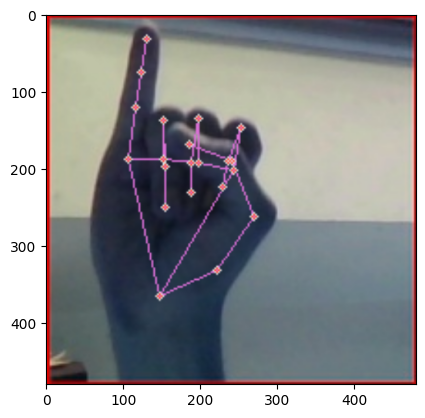

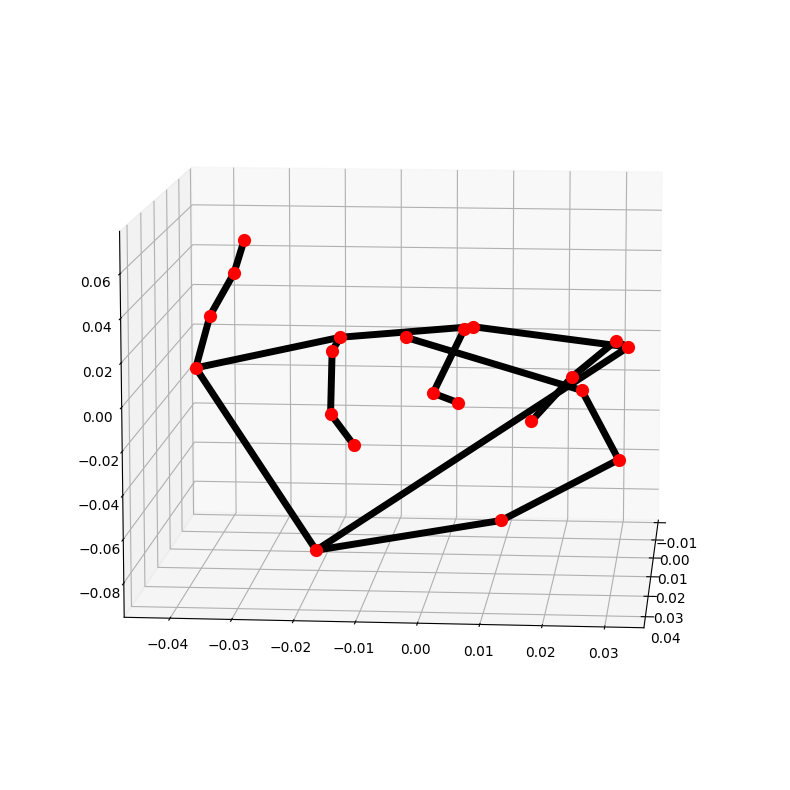

Image: J
Handedness: [classification {
  index: 0
  score: 0.9989025592803955
  label: "Left"
}
]


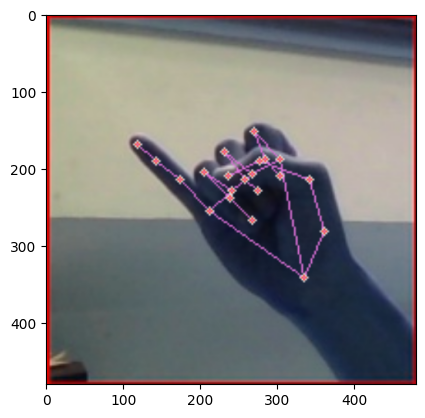

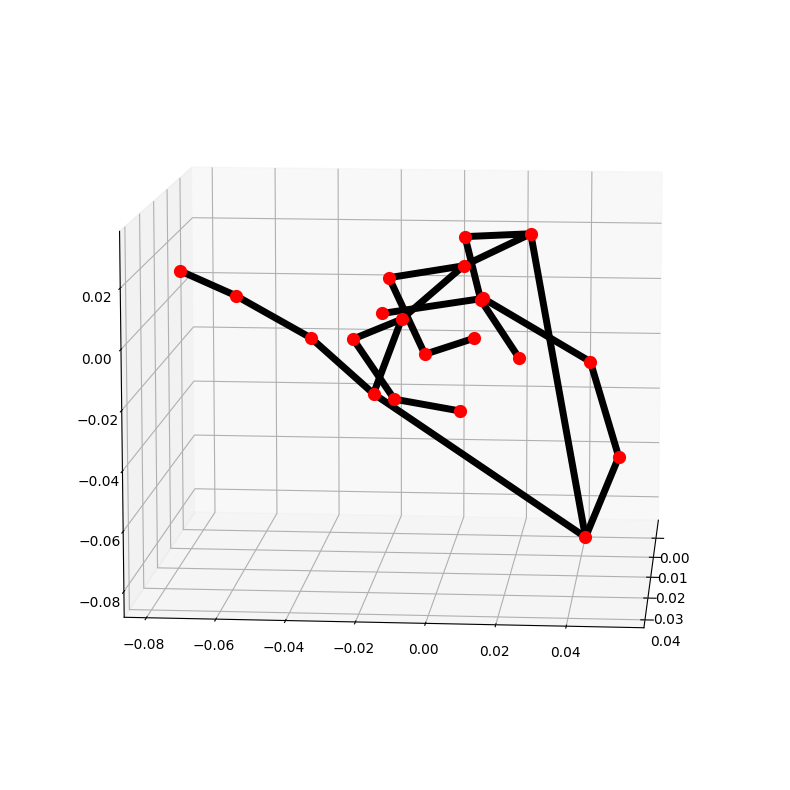

Image: K
Handedness: [classification {
  index: 0
  score: 0.9983197450637817
  label: "Left"
}
]


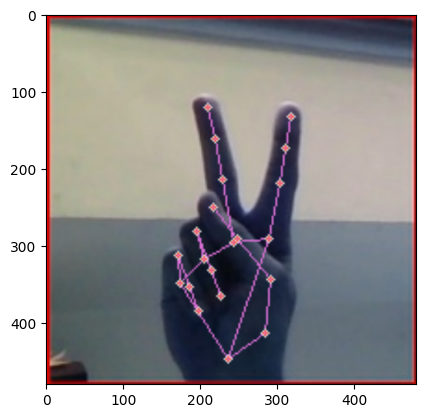

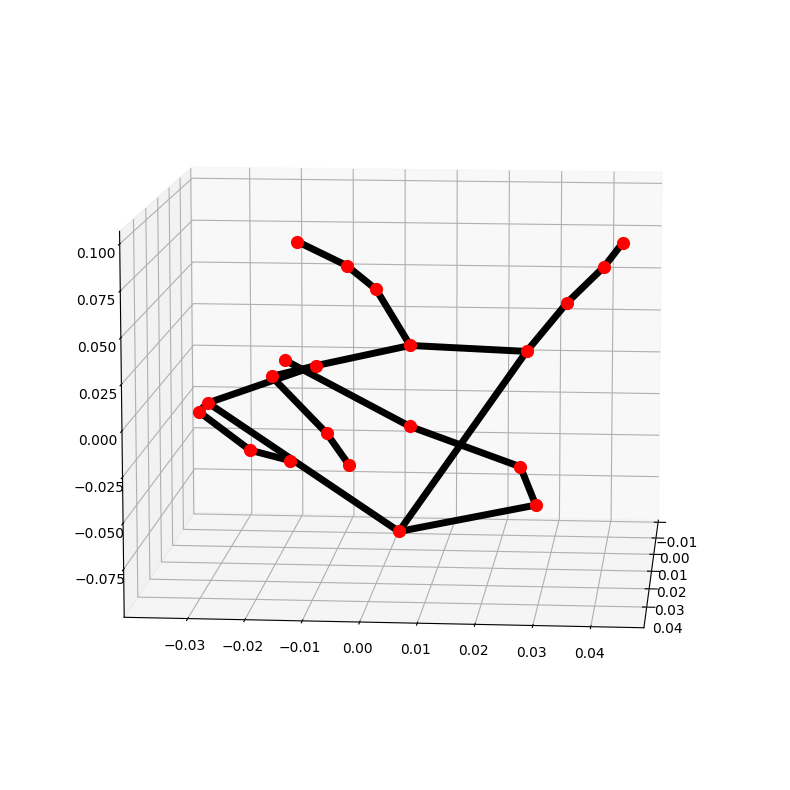

Image: L
Handedness: [classification {
  index: 0
  score: 0.9953169822692871
  label: "Left"
}
]


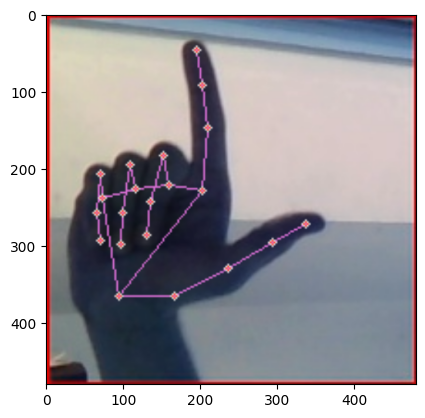

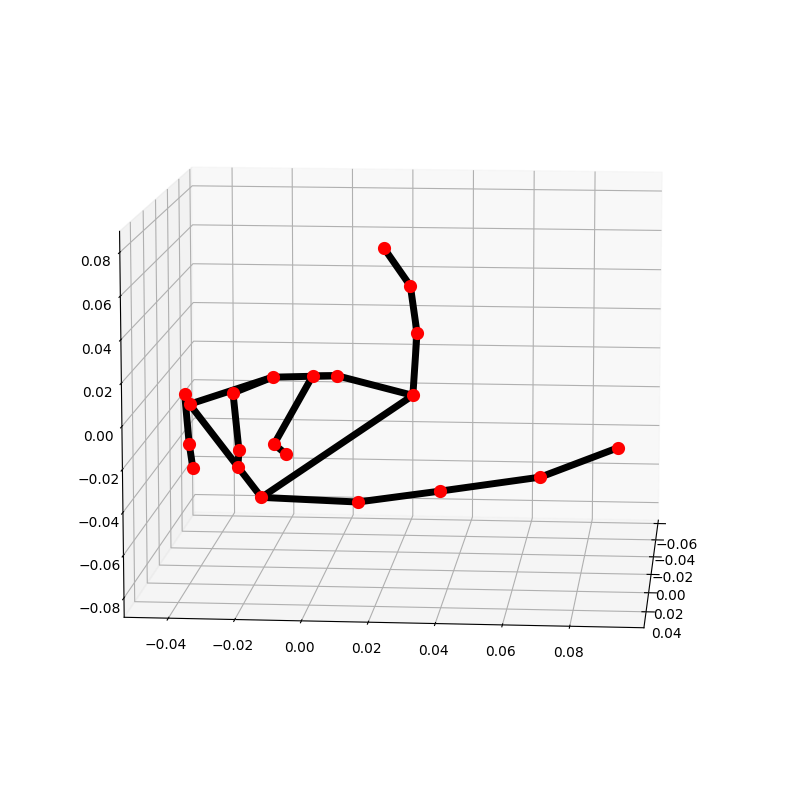

Image: M
Handedness: None
No Landmark Found for M
Image: N
Handedness: None
No Landmark Found for N
Image: O
Handedness: None
No Landmark Found for O
Image: P
Handedness: [classification {
  index: 0
  score: 0.9894498586654663
  label: "Left"
}
]


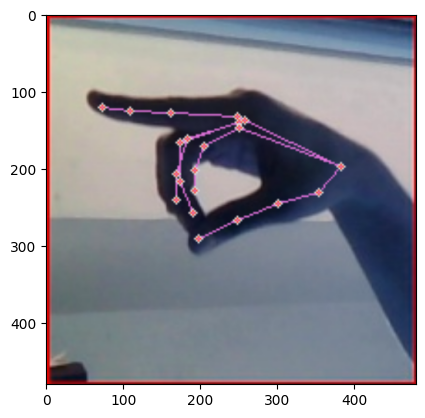

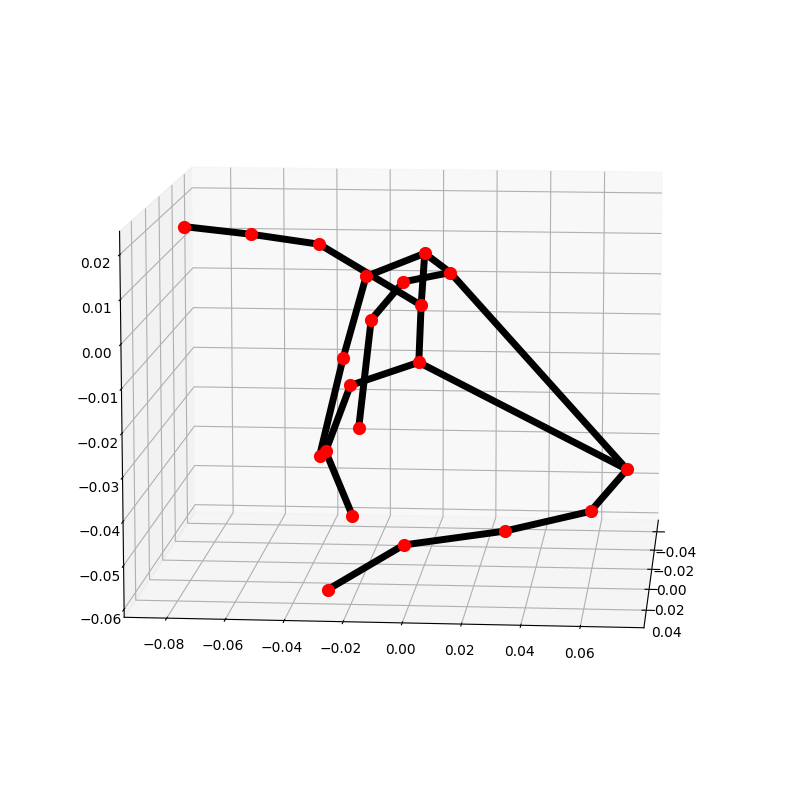

Image: Q
Handedness: [classification {
  index: 0
  score: 0.9697779417037964
  label: "Left"
}
]


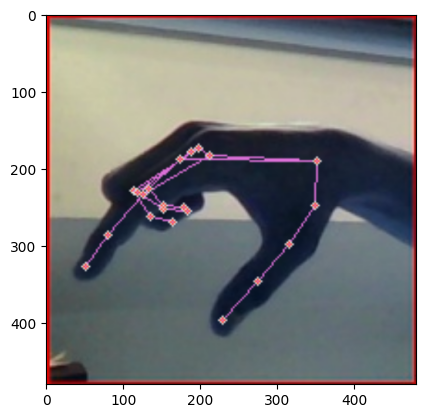

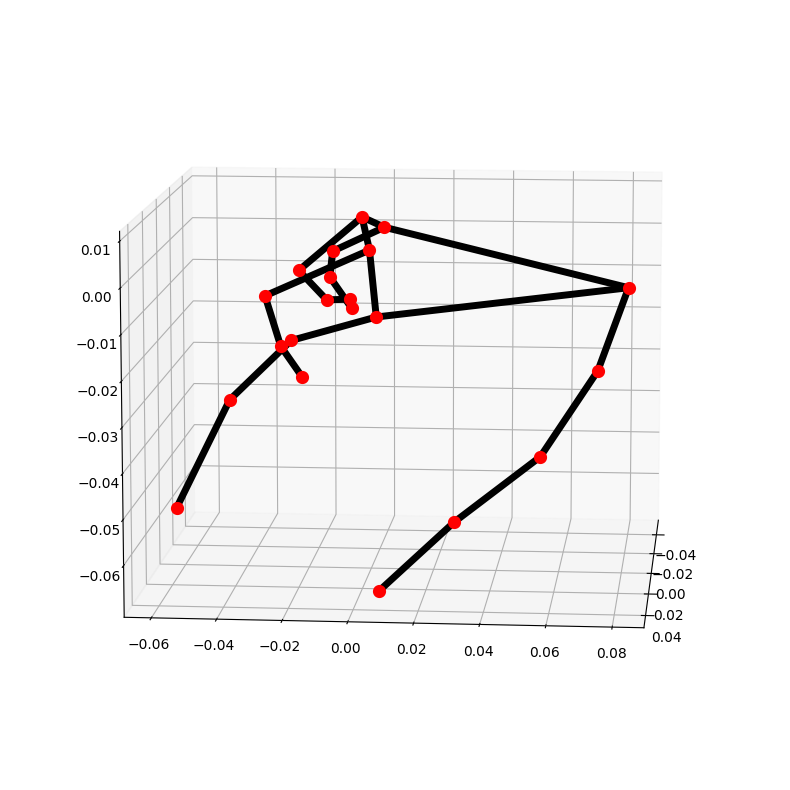

Image: R
Handedness: None
No Landmark Found for R
Image: S
Handedness: [classification {
  index: 0
  score: 0.9977726936340332
  label: "Left"
}
]


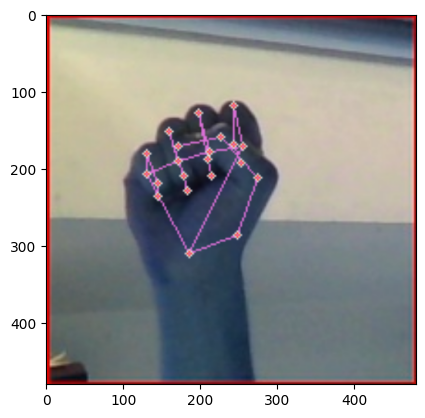

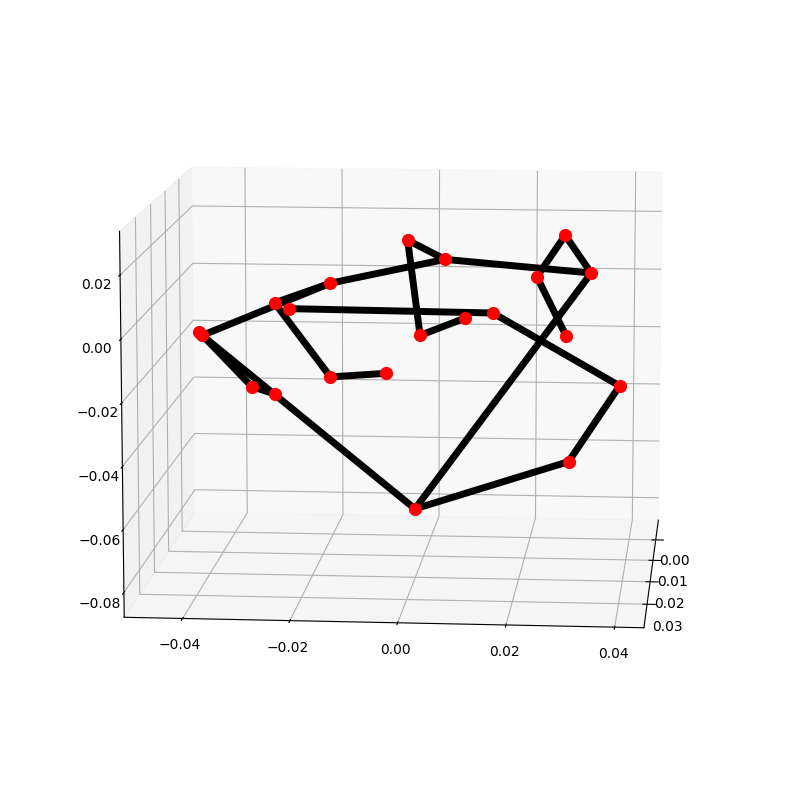

Image: T
Handedness: [classification {
  index: 0
  score: 0.9964762926101685
  label: "Left"
}
]


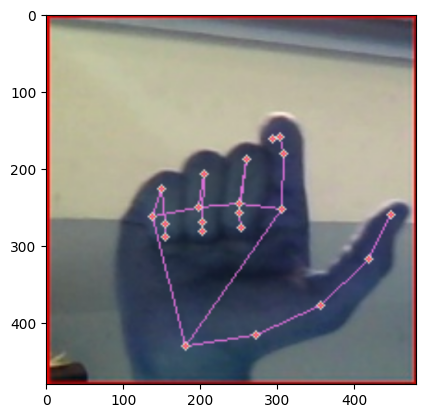

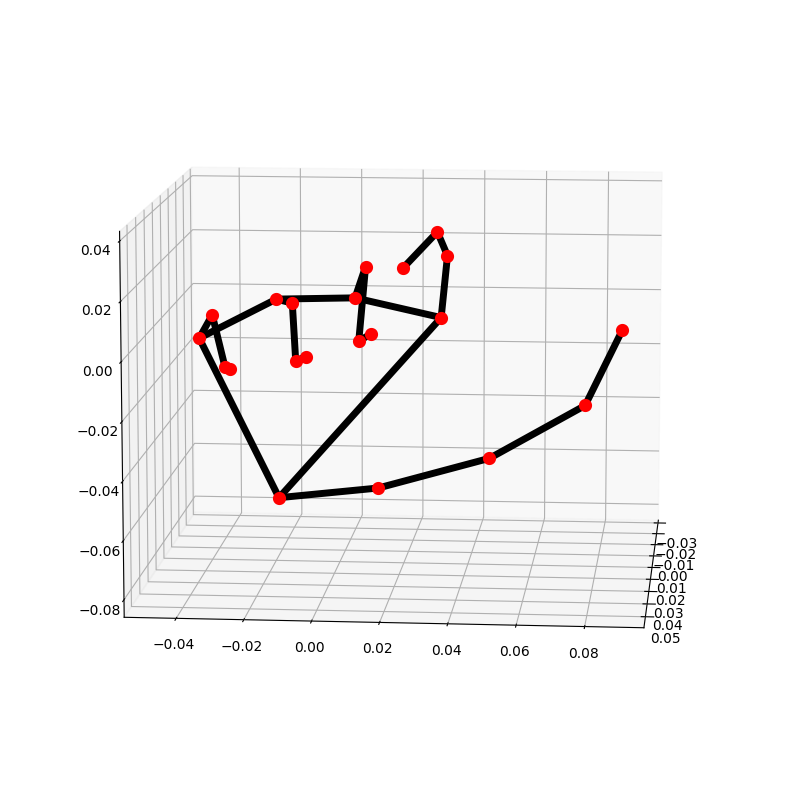

Image: U
Handedness: None
No Landmark Found for U
Image: V
Handedness: None
No Landmark Found for V
Image: W
Handedness: [classification {
  index: 0
  score: 0.6118602156639099
  label: "Left"
}
]


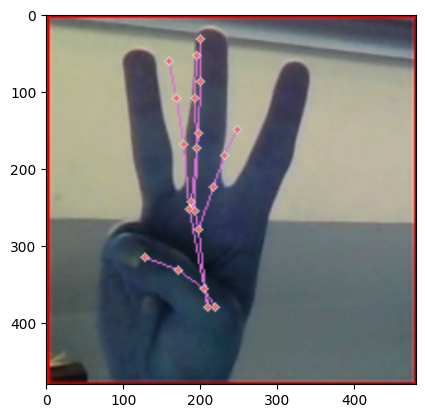

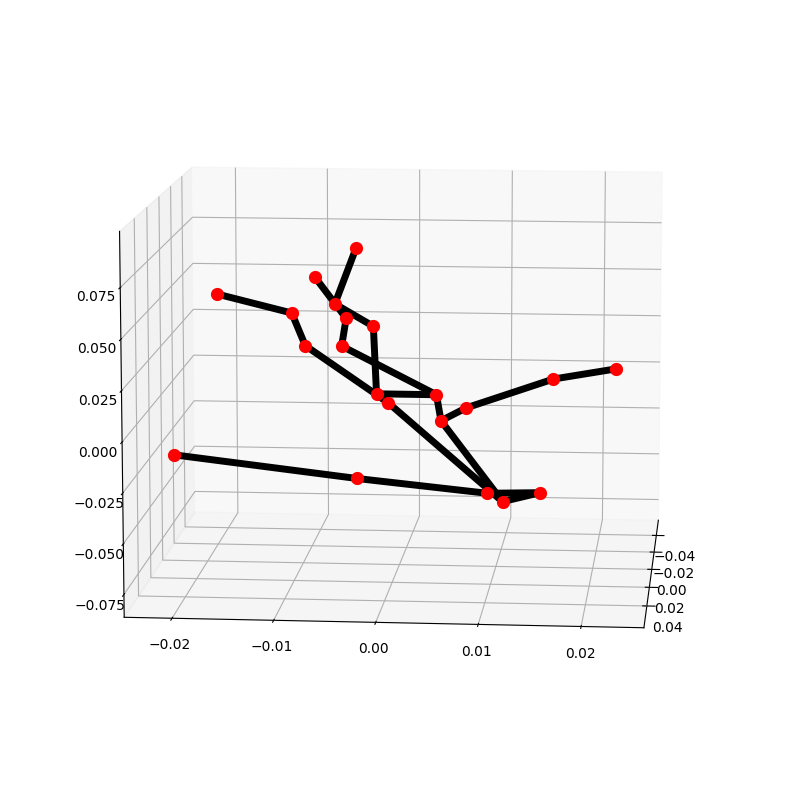

Image: X
Handedness: None
No Landmark Found for X
Image: Y
Handedness: [classification {
  index: 0
  score: 0.9966486096382141
  label: "Left"
}
]


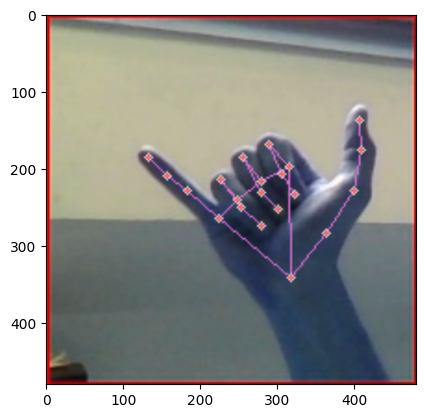

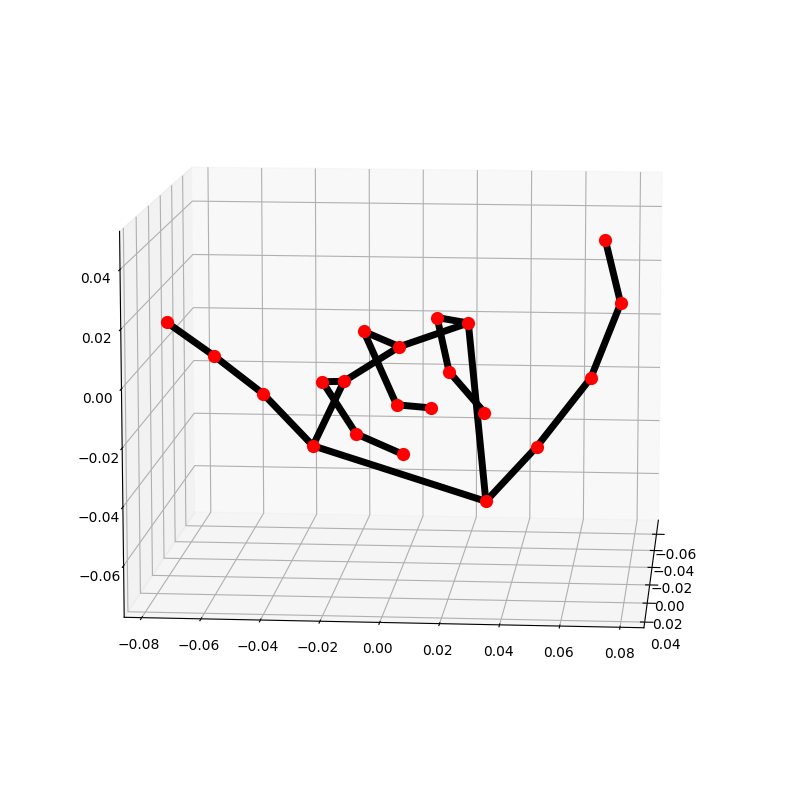

Image: Z
Handedness: None
No Landmark Found for Z
Image: nothing
Handedness: None
No Landmark Found for nothing
Image: space
Handedness: [classification {
  index: 1
  score: 0.9239094257354736
  label: "Right"
}
]


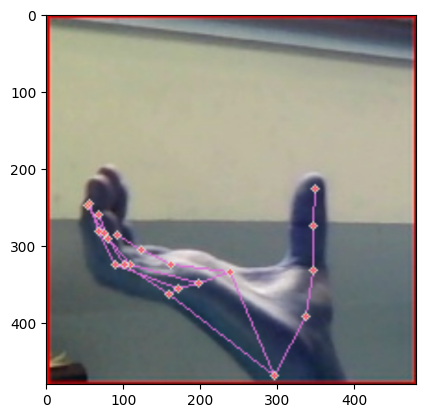

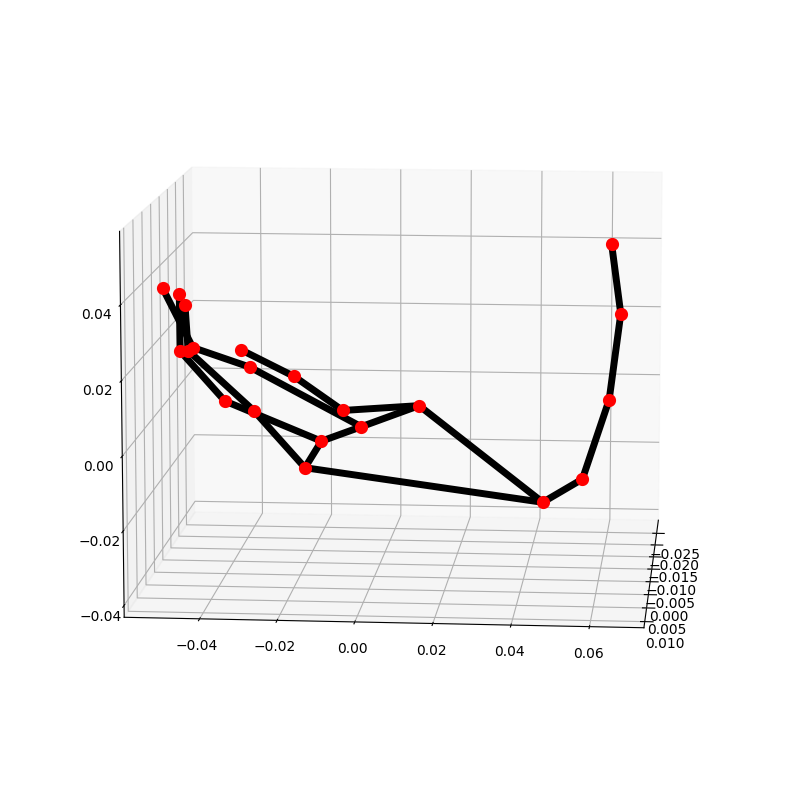

In [10]:
with mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.5, max_num_hands=1) as hands:
    for name, image in images.items():
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        image_height, image_width = image.shape[:2]
        print("\33[92m"+ "Image: {}".format(name.split("_")[0]) + "\033[0m")
        print('Handedness:', results.multi_handedness)

        if not results.multi_hand_landmarks:
            print("\33[31m"+"No Landmark Found"+"\033[0m"+ " for {}".format(name.split("_")[0]))
            continue

        annotated_image = image.copy()

        for hand_landmarks in results.multi_hand_landmarks:
            # print('hand_landmarks:', hand_landmarks)
            # print(
            #     f'Index finger tip coordinates: (',
            #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
            #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            # )

            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 68, 51), thickness=1, circle_radius=1),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(218, 112, 214), thickness=1, circle_radius=1))

        resize_and_show_image(annotated_image)

        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
                hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
        # break